# Monte-Carlo Simulation

## Aufgabenstellung

Wir betrachten weiter den Federspeicher aus Assignment 1. Diesmal simulieren wir die Ergebnisse der Fertigung für $N=10.000$ Zylinder. In diesem Assignment kommt die Federrate dazu. Das Federpaket besteht aus 24 Einzelfedern, die ineinander gesteckt auf dem Umfang des Zylinder verteilt sind. Die Toleranzen der Federn sind recht groß. Die Federn sind nominal

- $c_1 = (100 \pm 20)\, \mathrm{N/mm}$ 
- $c_2 = (150 \pm 30)\, \mathrm{N/mm}$ 
- $c_3 = (200 \pm 40)\, \mathrm{N/mm}$ 

Die Gesamtfederrate ergibt sich als

$$
c = \sum_{i=1}^{3} \sum_{j=1}^{8} c_{i,j}
$$

Die geometrischen Eigenschaften entspricht dem ersten Assignment:

 - Deviation $d$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Deviation $h_{1}$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Deviation $h_{2}$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Dev. $l$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$

Mit diesen Abweichungen vom Mittelwert ergibt sich die Kraft des Federspeichers als

$$
F = 2 i c(1 + h_1 + h_2 + l + d)
$$

mit der Übersetzungsrate des Zylinders $i = 2.6$.

Fragestellungen:

1. Federpaket:
   - a. Wie verhält sich das Federpaket im nominalen Zustand? Simuliert dazu mindestens $N=10^4$ stochastisch unabhängige Einzelfedern und bestimmt die Federrate von aus diesen Federn zusammengesetzten Federpaketen.
   - b. Die Federn $c_3$ liegen innerhalb der Toleranzen mit $c_3 < 200 \, \mathrm{N/mm}$. Wie ändert sich die Federrate?
2. Federspeicherzylinder: Welche Verteilungen ergeben sich für die Federspeicherzylinder mit Federpakete nach a. bzw. b.? Wie entwickelt sich der Anteil der konformen Einheiten ($F_{min} = 18 \,\mathrm{kN}$)?

Beantwortet die Fragestellungen in einem technischen Bericht mit Einleitung, Analyse und Beantwortung der Fragen.

# Assigment 3 Monte-Carlo-Simulation 
### a.Nominaler Zustand

In [40]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000 #Anzahl Federspeicher
P = 8 #Anzahl Federn Pro Paket 


Zu beginn erzeugen wir  $N=10^4$ stochastisch unabhängige Einzelfedern mit der Numpy.random Funktion

In [41]:
def Simulation_Einzelfedern(N,P):

    rng = np.random.default_rng()

    c1_values = rng.uniform(low = 80, high = 120, size = (N,P))
    c2_values = rng.uniform(low = 120, high = 180, size = (N,P))
    c3_values = rng.uniform(low = 160, high = 240, size = (N,P))

    return c1_values, c2_values, c3_values

Nun werden die Simulierten Federn getestet, indem die Funktion mit dem Wert N=1 und P=8 aufgerufen wird.  

In [42]:
Simulation_Einzelfedern(1,8)


(array([[ 81.10490103, 104.14402325,  90.0277779 ,  81.91591878,
         116.17712414,  96.69953889,  97.34786049,  88.12334437]]),
 array([[177.4624275 , 133.29731884, 166.36264893, 153.55279343,
         179.60991794, 149.2251431 , 176.19061654, 164.80713402]]),
 array([[219.09412004, 197.75042623, 210.58709868, 187.80273048,
         197.0508683 , 194.52209374, 196.56544687, 218.24671558]]))

Zu erkennen ist das jeweiles 8 einzelne Federn generiert werden, welche einen Zufälligen Wert im Toleranz Bereich erhalten. 

Nun wird eine Funktion erstellt, womit die Federrate ausgerechnet wird. Hierbei handelt es sich 

In [43]:
def Gesamtfederrate(N,P):
    c1_values, c2_values, c3_values = Simulation_Einzelfedern(N,P)

    # Berechnung der Gesamtfederrate c
    c_gesamt = np.sum(c1_values, axis = 1)+np.sum(c2_values, axis = 1)+np.sum(c3_values, axis = 1)

    return c_gesamt 

 Durchschnittliche Federrate: 3600.83 N/mm
 Varianz: 7752.41 (N/mm)²
 Standartabweichung: 88.05 N/mm 


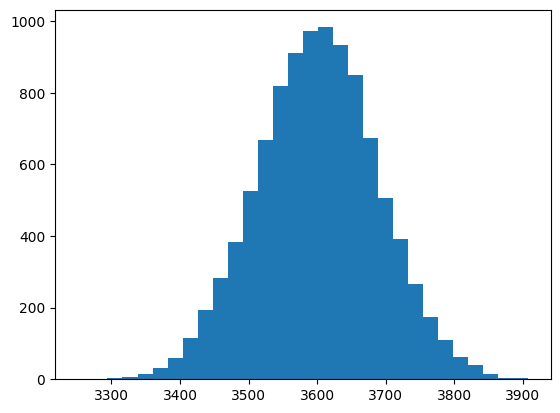

In [59]:
c_gesamt = Gesamtfederrate(N,P)
plt.hist(c_gesamt, bins = 30)

print(f" Durchschnittliche Federrate: {round(np.mean(c_gesamt),2)} N/mm")
print(f" Varianz: {round(np.var(c_gesamt),2)} (N/mm)²")
print(f" Standartabweichung: {round(np.std(c_gesamt),2)} N/mm ")

###